# Group 6

## Dipak Agrawal, Ishaan Verma, Amet Vikram, Shreya Arora

# ADALINE MODEL 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Model Class 

In [2]:
class Model:
    def __init__(self, no_of_inputs):
        """
        This function is the initialization of the adaline neuron
        """
        self.no_of_inputs = no_of_inputs
        self.weight_array = np.random.randn(no_of_inputs, 1)*10 #row vector
        print(self.weight_array)
        self.bias = 0

    def a(self, input_x): #input_x = input vector
        """
        This function is the function what calculates the weighted sum
        """
        return np.dot(input_x, self.weight_array) + self.bias

    def acti_func(self, x):               #using the signum function for now
        """
        This is the signum activation function
        """
        if x >= 0:
            return 1
        else:
            return -1

    def output(self, input_x):
        """
        This returns the output for a single input
        """
        return self.acti_func(self.a(input_x))
    
    def fitA(self, epochs, learn_rate, data_set):
        """
        This is the fit function for Case 1 and Case3
        """
        numpy_matrix = data_set.as_matrix()
        #print(numpy_matrix.shape)

        out_x = []
        out_y = []
        for i in range(epochs):  #number of iterations = epochs
            #print(i)
            weight_ARR = self.weight_array
            error_A = []
            error = 0
            for x in range(numpy_matrix.shape[0]):
                #print(numpy_matrix[x])
                X = numpy_matrix[x][:16]
                #print(X)
                #print(self.weight_array.shape)
                X = X.reshape(16, 1)
                #print(X)
                error_A.append(numpy_matrix[x][16] - np.transpose(X).dot(weight_ARR))
                error = numpy_matrix[x][16] - np.transpose(X).dot(self.weight_array)                           #X is the input vector
                self.weight_array = self.weight_array + 2*learn_rate*error*X
                self.bias = self.bias + 2*learn_rate*error[0][0] 
                #print(self.weight_array)
                #print("#" + " " + str(self.bias))
            
            sse = 0
            for x in range(len(weight_ARR)):
                sse = sse + weight_ARR[x]*weight_ARR[x]
            
            out_x.append(i+1)
            out_y.append(sse)
        
        #plt.xticks([])
        plt.yticks([])
        plt.ylabel("Error")
        plt.xlabel("Iterations")
        plt.plot(out_x, out_y)
    
    def fitB(self, epochs, learn_rate, data_set):
        """
        This is the fit function for Case 2
        """
        numpy_matrix = data_set.as_matrix()
        #print(numpy_matrix.shape)

        out_x = []
        out_y = []
        for i in range(epochs):  #number of iterations = epochs
            #print(i)
            weight_ARR = self.weight_array
            #error_A = []
            error = 0
            for x in range(numpy_matrix.shape[0]):
                #print(numpy_matrix[x])
                X = numpy_matrix[x][:16]
                #print(X)
                #print(self.weight_array.shape)
                X = X.reshape(16, 1)
                #print(X)
                #error_A.append(numpy_matrix[x][16] - np.transpose(X).dot(weight_ARR))
                error += numpy_matrix[x][16] - np.transpose(X).dot(self.weight_array)                           #X is the input vector
                #self.weight_array = self.weight_array + 2*learn_rate*error*X
                #self.bias = self.bias + 2*learn_rate*error[0][0] 
                #print(self.weight_array)
                #print("#" + " " + str(self.bias))
            error = error/8
            for x in range(numpy_matrix.shape[0]):
                #print(numpy_matrix[x])
                X = numpy_matrix[x][:16]
                #print(X)
                #print(self.weight_array.shape)
                X = X.reshape(16, 1)
                self.weight_array = self.weight_array + 2*learn_rate*error*X
                self.bias = self.bias + 2*learn_rate*error[0][0] 
            
    def test_acc(self, data_set, size):
        """
        This is to check accuracy using test data
        """
        numpy_matrix = data_set.as_matrix()
        sum_t = 0
        for x in range(numpy_matrix.shape[0]):
            #print(numpy_matrix[x])
            X = numpy_matrix[x][:16]
            #print(X)
            #print(self.weight_array.shape)
            #X = X.reshape(16, 1)
            #print(X)
            desired_output = numpy_matrix[x][16]
            y_output = self.output(X)
            if y_output == desired_output:
                sum_t = sum_t + 1
                
        return sum_t/size
        

# Graph function

In [3]:
def plot_graph(input_x):
    """
    This plots the points given as input
    """
    i = 1
    j = 4
    x = []
    y = []
    for x_t in range(len(input_x)):
        #print(type(input_x[x_t]))
        if input_x[x_t] == 1:
            x.append(i)
            y.append(j)
        i = i + 1
        if i == 5:
            j = j - 1
            i = 1
            
    plt.ylim(ymin = 0, ymax = 5)
    plt.xlim(xmin = 0, xmax = 5)
    plt.scatter(x, y)

# Adaline for Case 1 and Case 3

In [4]:
neuronA = Model(16)

[[ -5.92283298]
 [  6.14735125]
 [ -4.43517055]
 [ -2.00929968]
 [ -3.40443291]
 [  6.91148275]
 [-16.27328173]
 [ -0.98087513]
 [-10.89634113]
 [-11.56428753]
 [ -2.23951366]
 [ -3.79935901]
 [  1.41654752]
 [-10.08965966]
 [ -7.33543629]
 [ -1.95669648]]


   0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  Class
0  1  1  1  0  0  1  0  0  0  1   0   0   0   1   0   0      1
1  0  0  1  0  0  0  1  0  1  0   1   0   1   1   1   0     -1
2  0  1  1  1  0  0  1  0  0  0   1   0   1   1   1   0      1
3  0  0  0  1  0  0  0  1  0  1   0   1   0   1   1   1     -1
4  0  0  0  0  1  0  0  0  1  1   1   1   1   0   0   0      1
5  0  0  0  0  1  1  1  1  1  0   0   0   0   0   0   0     -1
6  1  0  0  0  1  1  1  1  0  0   0   1   0   0   1   1      1
7  1  0  1  1  0  0  0  1  0  0   1   1   0   0   0   0     -1


/home/dipak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


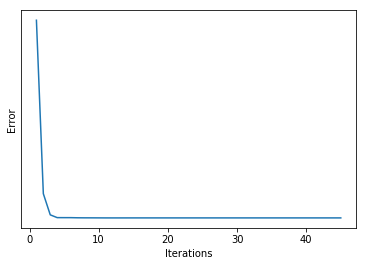

In [5]:
#Let number of iterations be 10
#Let learning rate be 0.01

#T is 1
#J is -1

dict_pre = {'0': [1, 0, 0, 0, 0, 0, 1, 1], '1': [1, 0, 1, 0, 0, 0, 0, 0],
            '2': [1, 1, 1, 0, 0, 0, 0, 1], '3': [0, 0, 1, 1, 0, 0, 0, 1],
            '4': [0, 0, 0, 0, 1, 1, 1, 0], '5': [1, 0, 0, 0, 0, 1, 1, 0],
            '6': [0, 1, 1, 0, 0, 1, 1, 0], '7': [0, 0, 0, 1, 0, 1, 1, 1],
            '8': [0, 1, 0, 0, 1, 1, 0, 0], '9': [1, 0, 0, 1, 1, 0, 0, 0],
            '10':[0, 1, 1, 0, 1, 0, 0, 1], '11':[0, 0, 0, 1, 1, 0, 1, 1],
            '12':[0, 1, 1, 0, 1, 0, 0, 0], '13':[1, 1, 1, 1, 0, 0, 0, 0],
            '14':[0, 1, 1, 1, 0, 0, 1, 0], '15':[0, 0, 0, 1, 0, 0, 1, 0]}

df = pd.DataFrame(data = dict_pre)
df['Class'] = [1, -1, 1, -1, 1, -1, 1, -1]
print(df)
#print(df)

neuronA.fitA(45, 0.1, df)

In [6]:
neuronA.test_acc(df, 8)

/home/dipak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:114: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.5

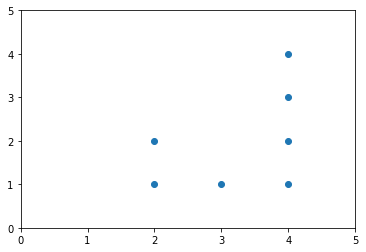

In [7]:
plot_graph([0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1])

In [8]:
neuronA.output([0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1])

1

# Adaline for Case 2

In [9]:
neuronB = Model(16)

[[-21.54582924]
 [-12.95153833]
 [  3.57742111]
 [  3.5612946 ]
 [  1.60422189]
 [ -5.01027806]
 [ -7.65742325]
 [ -4.7238426 ]
 [  4.61173886]
 [-10.87316183]
 [ -6.26000964]
 [  5.05030474]
 [ -3.54209171]
 [  7.00783561]
 [  3.42165331]
 [  9.70772331]]


In [10]:
neuronB.fitB(45, 0.1, df)

/home/dipak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:77: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [11]:
neuronB.test_acc(df, 8)

/home/dipak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:114: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.5

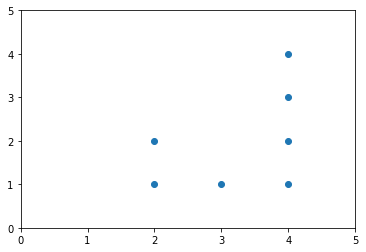

In [12]:
plot_graph([0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1])

In [13]:
neuronB.output([0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1])

1